# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import os

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [42]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


In [43]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
units='imperial'
query_url= f"{url}appid={weather_api_key}&units={units}&q="
# city_url = f"{url}appid={weather_api_key}&q={city}"
print(query_url)

http://api.openweathermap.org/data/2.5/weather?appid=fb7130a7feb0bddd87373d68685bcffc&units=imperial&q=


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [44]:
# Set the API base URL
url = 'http://api.openweathermap.org/data/2.5/weather?'

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | maintirano
Processing Record 2 of Set 1 | san patricio
Processing Record 3 of Set 1 | yellowknife
Processing Record 4 of Set 1 | lebu
Processing Record 5 of Set 1 | talnakh
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | whitehorse
Processing Record 8 of Set 1 | cabo san lucas
Processing Record 9 of Set 1 | tsengel
Processing Record 10 of Set 1 | ushuaia
Processing Record 11 of Set 1 | ilulissat
Processing Record 12 of Set 1 | el calafate
Processing Record 13 of Set 1 | viedma
Processing Record 14 of Set 1 | qaqortoq
Processing Record 15 of Set 1 | bilibino
Processing Record 16 of Set 1 | wainwright
Processing Record 17 of Set 1 | albany
Processing Record 18 of Set 1 | kangding
Processing Record 19 of Set 1 | cairns city
City not found. Skipping...
Processing Record 20 of Set 1 | ahau
City not found. Skipping...
Processing Record 21 of Set 1 | caleta de carquin
Pro

In [45]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [46]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,maintirano,-18.0667,44.0167,296.44,85,99,3.27,MG,1683861984
1,san patricio,28.0170,-97.5169,300.28,92,1,6.22,US,1683861914
2,yellowknife,62.4560,-114.3525,288.44,38,75,2.06,CA,1683861901
3,lebu,-37.6167,-73.6500,285.56,94,100,2.16,CL,1683861815
4,talnakh,69.4865,88.3972,259.38,82,60,4.85,RU,1683861792


In [47]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

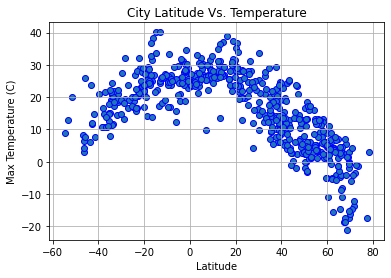

In [48]:
# Build scatter plot for latitude vs. temperature
maxtemp = city_data_df["Max Temp"]
Latitude=city_data_df["Lat"]
# Incorporate the other graph properties
plt.scatter(Latitude, maxtemp, marker="o", edgecolors= "blue")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude Vs. Temperature")
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

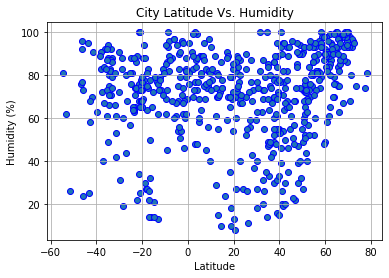

In [49]:
# Build the scatter plots for latitude vs. humidity
Latitude=city_data_df["Lat"]
Humidity = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(Latitude, Humidity, marker="o", edgecolors= "blue")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel("Humidity (%)")
plt.title("City Latitude Vs. Humidity")
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

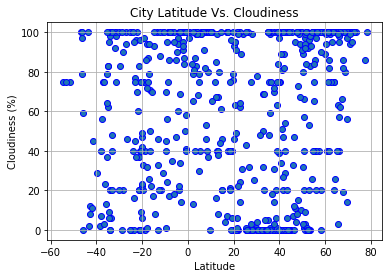

In [50]:
# Build the scatter plots for latitude vs. cloudiness
Latitude=city_data_df["Lat"]
cloudiness = city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(Latitude, cloudiness, marker="o", edgecolors= "blue")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel("Cloudiness (%)")
plt.title("City Latitude Vs. Cloudiness")
# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

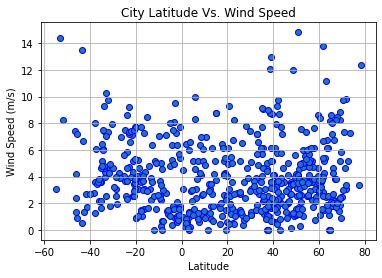

In [51]:
# Build the scatter plots for latitude vs. wind speed
Latitude=city_data_df["Lat"]
Wind_speed=city_data_df["Wind Speed"]
# Incorporate the other graph properties
plt.scatter(Latitude, Wind_speed, marker="o", edgecolors= "blue")
plt.grid()
plt.xlabel('Latitude')
plt.ylabel("Wind Speed (m/s)")
plt.title("City Latitude Vs. Wind Speed")
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [52]:
# Define a function to create Linear Regression plots
def linre():
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_value = x * slope + intercept
    line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))

In [53]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,faya,18.3851,42.4509,22.06,35,21,2.60,SA,1666108228
1,farsund,58.0948,6.8047,13.30,100,0,7.65,NO,1666108228
3,jamestown,42.0970,-79.2353,5.77,77,100,9.77,US,1666107934
4,lanzhou,36.0564,103.7922,14.53,48,59,1.20,CN,1666108230
6,albany,42.6001,-73.9662,10.36,74,29,2.10,US,1666108231


In [54]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df['Lat']< 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,new norfolk,-42.7826,147.0587,11.72,58,12,1.34,AU,1666108230
5,ushuaia,-54.8000,-68.3000,8.81,81,75,3.09,AR,1666108231
7,carnarvon,-24.8667,113.6333,20.02,76,0,7.46,AU,1666108232
9,saint-pierre,-21.3393,55.4781,22.82,68,0,5.14,RE,1666108236
10,colorado,-22.8375,-51.9731,20.36,86,96,4.69,BR,1666107965


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.7161472181434118


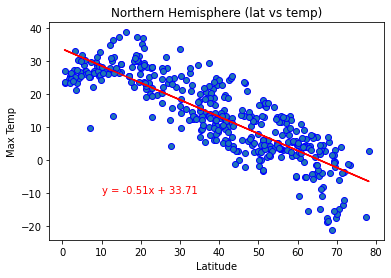

In [55]:
# Linear regression on Northern Hemisphere
tempnorth = northern_hemi_df['Max Temp']
latnorth = northern_hemi_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latnorth, tempnorth)
regress_value = latnorth * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))


plt.scatter(latnorth, tempnorth, marker="o", edgecolors= "blue")
plt.plot(latnorth, regress_value, 'red')
plt.title("Northern Hemisphere (lat vs temp)")
plt.xlabel('Latitude')
plt.ylabel("Max Temp")
plt.annotate(line_eq,(10,-10), color='red', fontsize= 10)
print(f"The r-value is {rvalue**2}")

plt.show()

The r-value is 0.4121057168607245


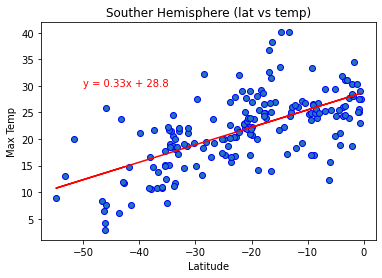

In [56]:
# Linear regression on Southern Hemisphere
tempsouth = southern_hemi_df['Max Temp']
latsouth = southern_hemi_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latsouth, tempsouth)
regress_value = latsouth * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))


plt.scatter(latsouth, tempsouth, marker="o", edgecolors= "blue")
plt.plot(latsouth, regress_value, 'red')
plt.title("Souther Hemisphere (lat vs temp)")
plt.xlabel('Latitude')
plt.ylabel("Max Temp")
plt.annotate(line_eq,(-50,30), color='red', fontsize= 10)
print(f"The r-value is {rvalue**2}")

plt.show()

**Discussion about the linear relationship:** As the latitude moved away from 0 or the equator, the temperature fell and the inverse of the latitude getting
closer to the equator made the temp increser.

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.05689741545789598


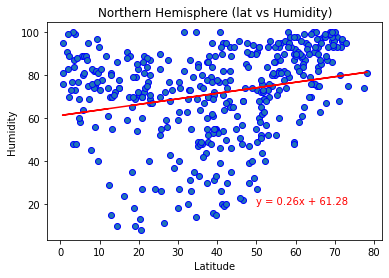

In [57]:
# Northern Hemisphere
huminorth = northern_hemi_df['Humidity']
latnorth = northern_hemi_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latnorth, huminorth)
regress_value = latnorth * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))


plt.scatter(latnorth, huminorth, marker="o", edgecolors= "blue")
plt.plot(latnorth, regress_value, 'red')
plt.title("Northern Hemisphere (lat vs Humidity)")
plt.xlabel('Latitude')
plt.ylabel("Humidity")
plt.annotate(line_eq,(50,20), color='red', fontsize= 10)
print(f"The r-value is {rvalue**2}")

plt.show()

The r-value is 0.0002808747046324607


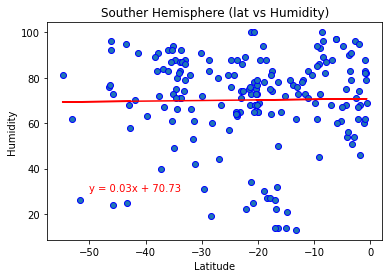

In [58]:
# Southern Hemisphere
humisouth = southern_hemi_df['Humidity']
latsouth = southern_hemi_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latsouth, humisouth)
regress_value = latsouth * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))


plt.scatter(latsouth, humisouth, marker="o", edgecolors= "blue")
plt.plot(latsouth, regress_value, 'red')
plt.title("Souther Hemisphere (lat vs Humidity)")
plt.xlabel('Latitude')
plt.ylabel("Humidity")
plt.annotate(line_eq,(-50,30), color='red', fontsize= 10)
print(f"The r-value is {rvalue**2}")

**Discussion about the linear relationship:** closer to the equator or 0 the humidity stays consistent, moving away from the equator has humidity rise. there is a relationship with humidity and latitude.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.024026517125811015


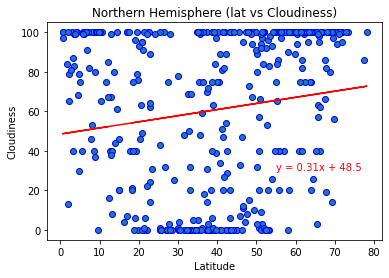

In [59]:
# Northern Hemisphere
cloudinessnorth = northern_hemi_df['Cloudiness']
latnorth = northern_hemi_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latnorth, cloudinessnorth)
regress_value = latnorth * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))


plt.scatter(latnorth, cloudinessnorth, marker="o", edgecolors= "blue")
plt.plot(latnorth, regress_value, 'red')
plt.title("Northern Hemisphere (lat vs Cloudiness)")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(55,30), color='red', fontsize= 10)
print(f"The r-value is {rvalue**2}")

The r-value is 0.02056735429994368


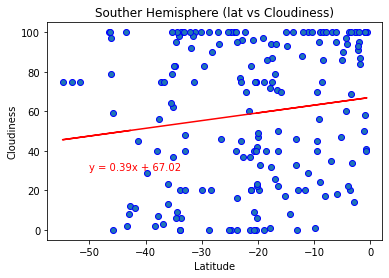

In [60]:
# Southern Hemisphere
cloudinessouth = southern_hemi_df['Cloudiness']
latsouth = southern_hemi_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latsouth, cloudinessouth)
regress_value = latsouth * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))


plt.scatter(latsouth, cloudinessouth, marker="o", edgecolors= "blue")
plt.plot(latsouth, regress_value, 'red')
plt.title("Souther Hemisphere (lat vs Cloudiness)")
plt.xlabel('Latitude')
plt.ylabel("Cloudiness")
plt.annotate(line_eq,(-50,30), color='red', fontsize= 10)
print(f"The r-value is {rvalue**2}")

**Discussion about the linear relationship:** moving from the southern hemisphere to the northern hemisphere we see the cloudiness rise as the latitidue changes moving higher.


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.030396762354449467


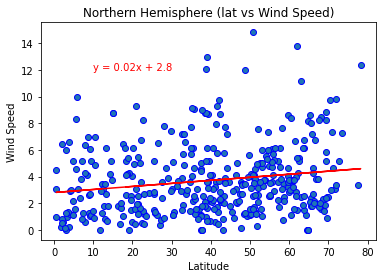

In [61]:
# Northern Hemisphere
windnorth = northern_hemi_df['Wind Speed']
latnorth = northern_hemi_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latnorth, windnorth)
regress_value = latnorth * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))


plt.scatter(latnorth, windnorth, marker="o", edgecolors= "blue")
plt.plot(latnorth, regress_value, 'red')
plt.title("Northern Hemisphere (lat vs Wind Speed)")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(10,12), color='red', fontsize= 10)
print(f"The r-value is {rvalue**2}")

The r-value is 0.062239040700515696


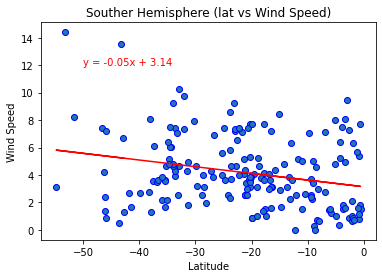

In [62]:
# Southern Hemisphere
windsouth = southern_hemi_df['Wind Speed']
latsouth = southern_hemi_df['Lat']

(slope, intercept, rvalue, pvalue, stderr) = linregress(latsouth, windsouth)
regress_value = latsouth * slope + intercept
line_eq = 'y = ' + str(round(slope,2)) + 'x + ' + str(round(intercept,2))


plt.scatter(latsouth, windsouth, marker="o", edgecolors= "blue")
plt.plot(latsouth, regress_value, 'red')
plt.title("Souther Hemisphere (lat vs Wind Speed)")
plt.xlabel('Latitude')
plt.ylabel("Wind Speed")
plt.annotate(line_eq,(-50,12), color='red', fontsize= 10)
print(f"The r-value is {rvalue**2}")

**Discussion about the linear relationship:** Closer to the equator the wind lowers in speed and then  farther from the equator the wind speed rises showing a relationship between the lat and windspeed.